In [ ]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder  # Asegúrate de incluir esta importación
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
# Loading the Iris dataset
data = pd.read_csv('/content/Iris.csv')
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Codificación de la variable objetivo 'Species' en valores numéricos
le = LabelEncoder()
le.fit(data['Species'].values)
y = le.transform(data['Species'].values)
X = data.drop('Species', axis=1).values


In [ ]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=10)


In [ ]:
# Entrenando el clasificador de árbol de decisión
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5, max_depth=None, random_state=10)
tree.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=10)

In [ ]:
# Realizando predicciones y evaluando el modelo
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        17

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



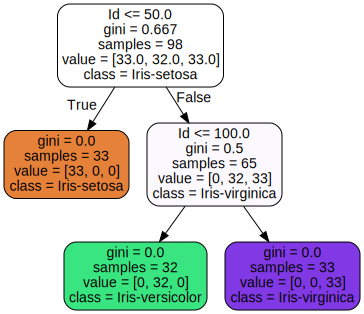

In [ ]:
# Función para visualizar el árbol de decisión
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = pd.unique(dataframe[label_col])
    graph_data = export_graphviz(tree, feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names, filled=True, rounded=True, out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph

# Visualizando el árbol de decisión
tree_graph = plot_tree(tree, data, 'Species', le, 'Iris Decision Tree')
tree_graph
